In [1]:
from timelapse_tools import daread
daread?

Signature: daread(img: Union[str, pathlib.Path, aicspylibczi.CziFile.CziFile]) -> <module 'dask.array' from '/usr/local/anaconda3/envs/timelapse_tools/lib/python3.7/site-packages/dask/array/__init__.py'>
Docstring: <no docstring>
File:      ~/Desktop/active/cell/timelapse_tools/timelapse_tools/utils/czi_reading.py
Type:      function


In [2]:
t, t_dims = daread("timelapse_tools/tests/data/s_1_t_5_c_1_z_1.czi")
print(t_dims)
t

/Users/jacksonb/Desktop/active/cell/timelapse_tools/timelapse_tools/tests/data/s_1_t_5_c_1_z_1.czi
STCZYX


dask.array<stack, shape=(5, 624, 924), dtype=uint16, chunksize=(1, 624, 924), chunktype=numpy.ndarray>

In [3]:
s, s_dims = daread("timelapse_tools/tests/data/s_None_t_5_c_1_z_None.czi")
print(s_dims)
s

/Users/jacksonb/Desktop/active/cell/timelapse_tools/timelapse_tools/tests/data/s_None_t_5_c_1_z_None.czi
TCYX


dask.array<stack, shape=(5, 1248, 1848), dtype=uint16, chunksize=(1, 1248, 1848), chunktype=numpy.ndarray>

In [4]:
p, p_dims = daread("/allen/aics/assay-dev/MicroscopyData/Melissa/2018/20180211/20180211_M04_001.czi")
print(p_dims)
p

/System/Volumes/Data/allen/aics/assay-dev/MicroscopyData/Melissa/2018/20180211/20180211_M04_001.czi
STCZYX


dask.array<stack, shape=(75000, 1900, 1400), dtype=uint16, chunksize=(1, 1900, 1400), chunktype=numpy.ndarray>

In [9]:
from dask.optimization import cull
cull(t, [0, 0, 0]).visualize("tasks.svg")

ValueError: The truth value of a Array is ambiguous. Use a.any() or a.all().

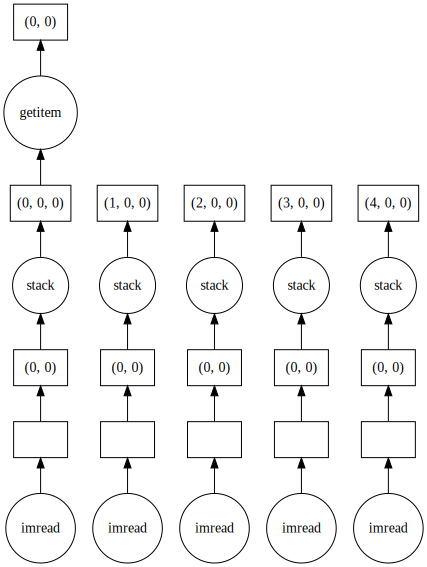

In [18]:
d, deps = cull(t[0, :].__dask_graph__(), t[0, :].__dask_keys__())
t[0, :]

In [21]:
from dask import compute
compute(d)

({('getitem-98aaf471cd363cb11e0940a26edc4b42',
   0,
   0): (<function _operator.getitem(a, b, /)>, ('stack-516c61c91f3d6936c6df19b4c1fda0b8',
    0,
    0,
    0), (0, slice(None, None, None), slice(None, None, None))),
  ('stack-516c61c91f3d6936c6df19b4c1fda0b8',
   0,
   0,
   0): (<function _operator.getitem(a, b, /)>, ('from-value-f28a7ede3fc66fa0c820df8a16a509af',
    0,
    0), (None, slice(None, None, None), slice(None, None, None))),
  ('from-value-f28a7ede3fc66fa0c820df8a16a509af',
   0,
   0): '_imread-dd30aa5d-bdb1-46a7-9ee3-bd25409ef26b',
  '_imread-dd30aa5d-bdb1-46a7-9ee3-bd25409ef26b': (<function timelapse_tools.utils.czi_reading._imread(img: aicspylibczi.CziFile.CziFile, read_dims: Union[Dict[str, int], NoneType] = None) -> numpy.ndarray>,
   (dict, [['S', 0], ['T', 0], ['C', 0], ['Z', 0]]))},)

In [26]:
from dask import optimize
optimize(t[0, :])[0].compute()

array([[405, 404, 412, ..., 397, 414, 414],
       [394, 408, 403, ..., 412, 419, 392],
       [403, 397, 406, ..., 410, 416, 409],
       ...,
       [407, 408, 423, ..., 398, 398, 405],
       [428, 402, 405, ..., 403, 402, 405],
       [412, 398, 413, ..., 404, 403, 403]], dtype=uint16)